<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ehsan Merrikhi 

**Student ID**: 400101967





## Importing Libraries

First we import libraries that we need for this assignment.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [136]:
X, Y = None, None

### START CODE HERE ###

# read data
data1 = pd.read_csv('data_logistic.csv')
X = data1.drop('Y', axis=1)
Y = data1['Y']
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

By normalizing we can avoid bias and inconsistencies that may arise due to differences in measurement units or the magnitude of the variables.

Normalizing data allows for fair comparisons between different features and variables.

It reduces the impact of outliers and extreme values in the data.

In [137]:
### START CODE HERE ###
X_mean = X.mean()
X_std = X.std()
X = (X-X_mean) / X_std
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [138]:
### START CODE HERE ###
row_num, col_num = X.shape
try:
    X.insert(0, "bias", np.ones(row_num), allow_duplicates=False)
except ValueError:
    print("Row was already added")
### END CODE HERE ###
print(X.shape)

(10000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [139]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    nom = 1
    denom = 1+np.exp(-Z)
    return nom / denom

print(sigmoid(Z=X))
### END CODE HERE ###

          bias        X1        X2        X3
0     0.731059  0.268821  0.353123  0.299396
1     0.731059  0.189449  0.849467  0.449578
2     0.731059  0.565221  0.844398  0.655277
3     0.731059  0.336021  0.216366  0.330172
4     0.731059  0.599493  0.615876  0.409106
...        ...       ...       ...       ...
9995  0.731059  0.702753  0.758621  0.799507
9996  0.731059  0.768382  0.225023  0.847263
9997  0.731059  0.794801  0.470322  0.804148
9998  0.731059  0.804900  0.682427  0.719907
9999  0.731059  0.688492  0.816954  0.701963

[10000 rows x 4 columns]


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [140]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''
    
    m, n = X.shape
    loss = 0
    ### START CODE HERE ###
    h_theta = sigmoid(np.dot(X, theta))
    regular_term = (regLambda / (2 * m)) * np.sum(np.linalg.norm(theta, ord=2))
    loss = 1/m * np.sum(-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)) + regular_term
    # print(loss)
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

the gradient for the $j^{th}$ parameter is the average error multiplied by the $j^{th}$ feature, summed over all examples

In [141]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''
    
    m, n = X.shape
    grad = None
    ### START CODE HERE ###
    if theta is None:
        theta = np.zeros(n) 
    
    h = sigmoid(np.dot(X, theta))
    
    grad = (1/m) * np.dot(X.T, (h - y))
    reg_term = (regLambda / m) * theta
    reg_term[0] = 0
    grad += reg_term
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [142]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''
    
    m, n = X.shape
    theta, theta_old, loss_history = np.zeros(n), np.zeros(n), np.zeros(n)
    loss_history = []
    ### START CODE HERE ###
    # print("Hi")

    
    for i in range(maxNumIters):
        grad = computeGradient(theta, X, y, regLambda)
        
        if theta is None:
            theta = np.zeros(n)
        theta = theta - alpha * grad
        
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)
        
        if hasConverged(theta_old, theta, epsilon):
            print(loss_history)
            break
        theta_old = theta.copy()
    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    
    ### START CODE HERE ###
    if np.linalg.norm(theta_new - theta_old, ord=2) <= epsilon:
        return True
    ### END CODE HERE ###
    return False

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

Final Theta: [ 0.14721268 -0.21749975  0.23678323  0.07455369]
Loss History:


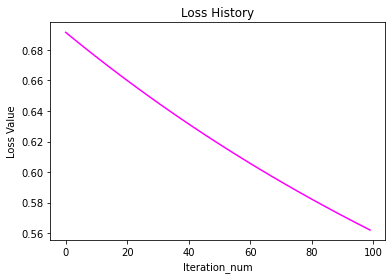

In [143]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###
print("Final Theta:", theta)
print("Loss History:")

plt.figure()
plt.plot(loss_history, color='magenta')
plt.xlabel('Iteration_num')
plt.ylabel('Loss Value')
plt.title('Loss History')
plt.show()
# for i, loss in enumerate(loss_history):
#     print(f"Iteration {i+1}: Loss = {loss:.4f}")
### END CODE HERE ###

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [144]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
data = pd.read_csv('data_logistic.csv')
X = data.drop('Y', axis=1)
Y = data['Y']

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=67)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=67)

print('X_train shape: ',X_train.shape)
print('X_val shape: ',X_val.shape)
print('X_test shape: ',X_test.shape)
### END CODE HERE ###

X_train shape:  (7000, 3)
X_val shape:  (2000, 3)
X_test shape:  (1000, 3)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [145]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''
    
    Y = None
    ### START CODE HERE ###
    h_theta_x = sigmoid(np.dot(X, theta))
    Y = (h_theta_x > 0.5).astype(int)
    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

Learning Rate ($\alpha$): This parameter controls how much the weights in the model are adjusted with respect to the gradient of the loss function. A high learning rate can cause the model to converge quickly but can overshoot the minimum, leading to divergence. A low learning rate ensures more reliable convergence but can make the training process very slow, and the model might get stuck in local minima.

Regularization Constant ($\lambda$): Regularization helps prevent overfitting by adding a penalty term to the loss function. The regularization constant determines the strength of this penalty. A high (\lambda) can lead to underfitting as it might overly penalize the weights, making them too small. A low (\lambda) might not effectively prevent overfitting, as the penalty would be insignificant.



C:\Users\IT CITY\AppData\Local\Temp\ipykernel_5976\1631097078.py:18: RuntimeWarning: divide by zero encountered in log
  loss = 1/m * np.sum(-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)) + regular_term
C:\Users\IT CITY\AppData\Local\Temp\ipykernel_5976\1191766210.py:11: RuntimeWarning: overflow encountered in exp
  denom = 1+np.exp(-Z)


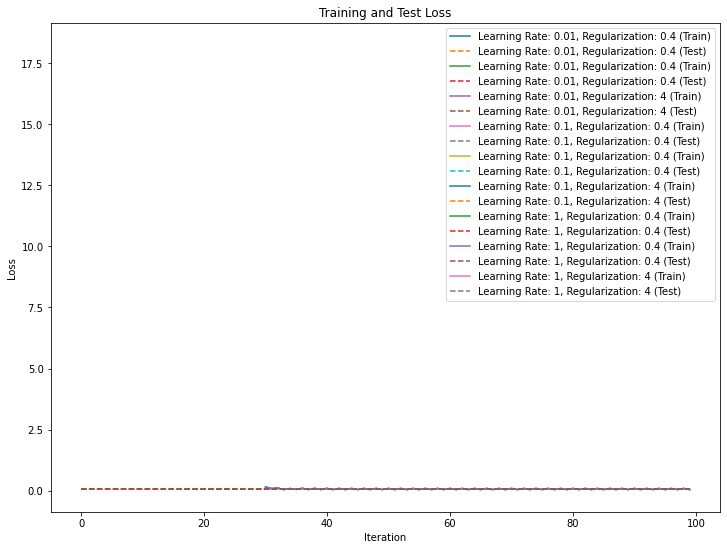

In [146]:
import itertools
import matplotlib.pyplot as plt

loss_histories_train = []
loss_histories_test = []

alphas = [0.01, 0.1, 1]
regLambdas = [0.4, 0.4, 4]

# Single loop over the product of alphas and regLambdas
for alpha, regLambda in itertools.product(alphas, regLambdas):
    # Train + Loss
    theta, loss_history_train = fit(X_train, Y_train, alpha=alpha, regLambda=regLambda)
    loss_history_test = computeCost(theta, X_test, Y_test, regLambda)            
    loss_histories_train.append(loss_history_train)
    loss_histories_test.append(loss_history_test)

plt.figure(figsize=(12,9))
# Plotting
for i, (alpha, regLambda) in enumerate(itertools.product(alphas, regLambdas)):
    label = f'Learning Rate: {alpha}, Regularization: {regLambda}'
    plt.plot(loss_histories_train[i], label=label + ' (Train)')
    plt.plot([loss_histories_test[i]] * len(loss_histories_train[i]), '--', label=label + ' (Test)')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()


## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.9255

In [147]:
### START CODE HERE ###
data = pd.read_csv('data_logistic.csv')
X = data.drop('Y', axis=1)
Y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=67)
gaussianmodel = GaussianNB()
gaussianmodel.fit(X_train, y_train)

y_test_pred = gaussianmodel.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'accuracy is: {accuracy:.6f}')
### END CODE HERE ###

accuracy is: 0.925500


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.9935

In [148]:
### START CODE HERE ###
data = pd.read_csv('data_logistic.csv')
X = data.drop('Y', axis=1)
Y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=67)
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

y_test_pred = LDA_model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'accuracy is: {accuracy:.6f}')
### END CODE HERE ###

accuracy is: 0.993500


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:
LDA outperformed GNB for classifying the dataset. LDA achieved an accuracy of *99.20%* on the test set, while GNB achieved a lower accuracy of *93.10%*.
